# Base4 lesson (Aluminium)

<div class="jumbotron">
  <h1 class="display-3">Fourth (basic) lesson with Abinit and AbiPy</h1>
  <p class="lead">The H<sub>2</sub> molecule</p> 
  <hr class="my-4">
  <p>This lesson aims at showing how to get the following physical properties, for a metal, and for a surface:

the total energy
the lattice parameter
the relaxation of surface atoms
the surface energy You will learn about the smearing of the Brillouin zone integration, and also a bit about preconditioning the SCF cycle.
This lesson should take about 1 hour and 30 minutes.
</p>
  <p class="lead">
    <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
  </p>
</div>This tutorial is a complement to the standard [ABINIT tutorial on aluminum](https://docs.abinit.org/tutorial/base4). Here, powerful flow and visualisation procedures
will be demonstrated. Still, some basic understanding of the stand-alone working of ABINIT is a prerequisite.
Also, in order to fully benefit from this Abipy tutorial, other more basic Abipy tutorials should have been followed,
as suggested in the [abitutorials index page](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb).

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## The convergence study with respect to k points and broadening

Note that there is usually a STRONG cross-convergence effect between the number 
of k points and the value of the broadening, tsmear.
The right procedure is: for each value of tsmear, to get the convergence with respect 
to the number of k points, then to compare the k-point converged values for different values of tsmear.

In what follows, we will restrict ourselves to the grids with nkpt=2, 10 and 28.

As usual, we start by writing an helper function to generate the input for the structural relaxation of Al.
The function accepts `tsmear` and another parameter, `nksmall`, that will be used to define the BZ sampling:

In [2]:
from lesson_base4 import relax_input
abilab.print_source(relax_input)

Now we use `relax_input` to generate multiple inputs with different values of `tsmear` and `nksmall`
and we pass the input objects to the Flow constructor.
To keep things as simple as possible, we use independent tasks ...

In [3]:
from lesson_base4 import build_relax_tsmear_nkpts_convflow
abilab.print_source(build_relax_tsmear_nkpts_convflow)

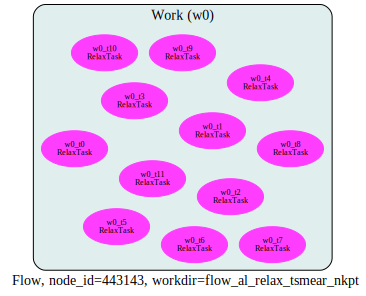

In [4]:
flow = build_relax_tsmear_nkpts_convflow(options=None)
flow.get_graphviz()

In [5]:
for task in flow.iflat_tasks():
    print(task.pos_str, "ngkpt", task.input["ngkpt"], 
          "tsmear", task.input["tsmear"], "occopt", task.input["occopt"])

w0_t0 ngkpt [2 2 2] tsmear 0.01 occopt 4
w0_t1 ngkpt [4 4 4] tsmear 0.01 occopt 4
w0_t2 ngkpt [6 6 6] tsmear 0.01 occopt 4
w0_t3 ngkpt [2 2 2] tsmear 0.02 occopt 4
w0_t4 ngkpt [4 4 4] tsmear 0.02 occopt 4
w0_t5 ngkpt [6 6 6] tsmear 0.02 occopt 4
w0_t6 ngkpt [2 2 2] tsmear 0.03 occopt 4
w0_t7 ngkpt [4 4 4] tsmear 0.03 occopt 4
w0_t8 ngkpt [6 6 6] tsmear 0.03 occopt 4
w0_t9 ngkpt [2 2 2] tsmear 0.04 occopt 4
w0_t10 ngkpt [4 4 4] tsmear 0.04 occopt 4
w0_t11 ngkpt [6 6 6] tsmear 0.04 occopt 4


In [6]:
#abo = abilab.abiopen("flow_al_relax/w0/t0/run.abo")
#print(abo)

In [7]:
#abo.plot();

In [8]:
#hist = abilab.abiopen("flow_al_relax/w0/t0/outdata/out_HIST.nc")
#print(hist)

In [9]:
#hist.plot();

In [10]:
robot = abilab.GsrRobot.from_dir("flow_al_relax_tsmear_nkpt")
robot

ValueError: flow_al_relax_tsmear_nkpt: no such directory

In [ ]:
robot.remap_labels(lambda gsr: "nkpt: %d, tsmear %.2f" % (gsr.nkpt, gsr.tsmear))

In [ ]:
data = robot.get_dataframe()
print(data.keys())

First of all, let's sort our rows first by `nkpt` and then by `tsmear` inside each `nkpt` group so that 
we have print the table in a nice format:

In [ ]:
data = data[["nkpt", "tsmear", "a", "alpha", "energy", "pressure", "volume", "max_force"]]

In [ ]:
data = data.sort_values(by=["nkpt", "tsmear"])
data

In [ ]:
import seaborn as sns
sns.pairplot(data, x_vars="nkpt", y_vars=["energy", "a", "volume"], hue="tsmear");

In [ ]:
y_vars = ["energy", "structure.lattice.a", "structure.volume"]

robot.plot_convergence_items(y_vars, sortby="nkpt", hue="tsmear");

In [ ]:
eframe = robot.get_energyterms_dataframe();
eframe

In [ ]:
with abilab.abiopen("flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc") as gsr:
    ebands_w0t11 = gsr.ebands

ebands_w0t11.plot();

In [ ]:
ebands_w0t11.boxplot();

Now you might ask yourself: "The total energy with nkpt == 2 is clearly not converged wrt tsmear. What are the effects of the smearing on the KS eigenvalues for nkpt == 2?"
The `GsrRobot` can construct an `ElectronBandsPlotter` that allows us to compare multiple band structures 
so it's just a matter of telling the robot that we want a plotter object in which only the
`GSR` files with only two k-points in the IBZ, then we can use the plotter to visualize the results:

In [ ]:
plotter = robot.get_ebands_plotter()
plotter.gridplot();

In [ ]:
robot.gridplot_with_hue(hue="nkpt");

The plotter provides different plot methods to visualize the same data.
Perhaps you prefer this:

In [ ]:
plotter.combiboxplot();

In [ ]:
#robot.boxplot_ebands();

In [ ]:
robot.combiboxplot_ebands();

In [ ]:
edos_plotter = robot.get_edos_plotter(width=0.1, step=0.2)

In [ ]:
edos_plotter.combiplot();

In [ ]:
edos_plotter.gridplot();

In [ ]:
#e3d = ebands_w0t11.get_ebands3d()
#e3d.plot_isosurfaces()

A logical next lesson would be the the tutorial on 
[phonon calculations with DFPT](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/dfpt/lesson_dfpt.ipynb)